In [2]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [3]:
# 2. Load Dataset
df = pd.read_csv('/content/flu.csv')

# 3. Normalisasi nilai numerik (jika ada yang berupa string)
df['CReactiveProteinLevels'] = pd.to_numeric(df['CReactiveProteinLevels'], errors='coerce')

In [4]:
# 4. Pilih fitur yang relevan untuk modeling
selected_columns = ['Diagnosis', 'Age', 'Sex', 'Temperature', 'Fever', 'Coughing', 'Fatigue']
df = df[selected_columns]

# 5. Tangani missing values
num_cols = ['Age', 'Temperature']
cat_cols = ['Sex', 'Fever', 'Coughing', 'Fatigue']


In [5]:
# Imputasi numerik dengan median
df[num_cols] = SimpleImputer(strategy='median').fit_transform(df[num_cols])

# Imputasi kategorikal dengan modus
df[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[cat_cols])

In [6]:
# 6. Encoding
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])  # encode target

for col in cat_cols:
    df[col] = le.fit_transform(df[col])  # encode fitur kategorikal

# 7. Split data
X = df.drop(columns='Diagnosis')
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 8. Standardisasi fitur numerik
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 9. Inisialisasi dan latih model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)
}

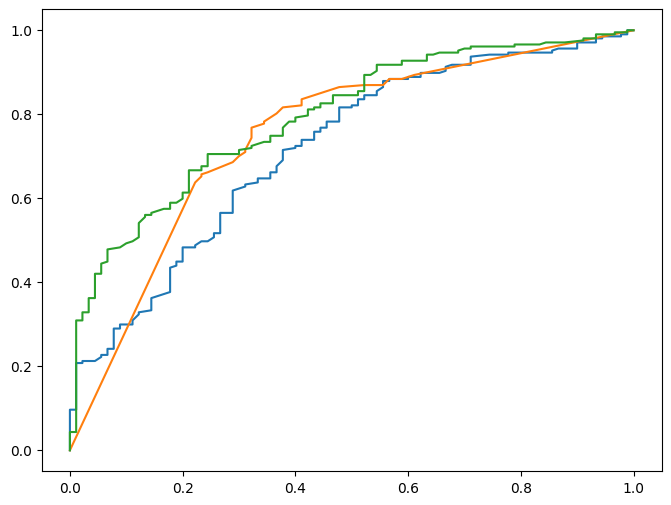

In [8]:
# 10. Evaluasi model
results = []

plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Simpan hasil evaluasi
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-Score": f1_score(y_test, y_pred, average='macro'),
        "AUC": roc_auc_score(y_test, y_proba)
    })

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

<ipython-input-9-6b1fa6501496>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


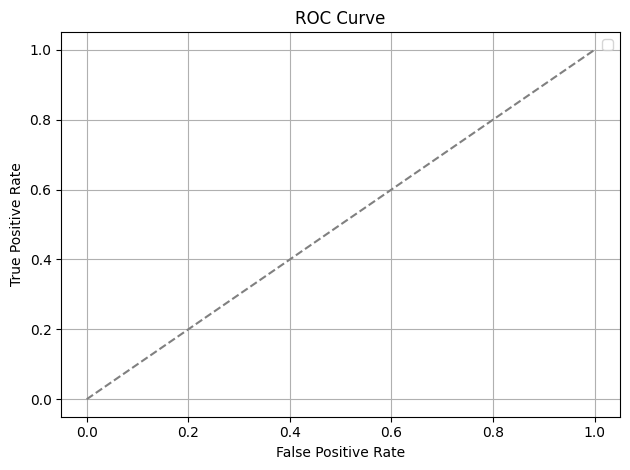

                 Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.734007   0.681579  0.633333  0.642926  0.718035
1        Decision Tree  0.760943   0.716502  0.712319  0.714303  0.751583
2                  SVM  0.771044   0.742405  0.675604  0.691230  0.793720


In [9]:
# 11. Plot ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. Tampilkan hasil evaluasi
results_df = pd.DataFrame(results)
print(results_df)